In [ ]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [ ]:
### 나눔 고딕 설치
!apt-get update -qq # 설치를 업데이트 -qq : 로그를 최소한으로
!apt-get install fonts-nanum* -qq # 설치한다. fonts-nanum* => ttf-nanum, ttf-nanum-coding, ttf-na

Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


In [ ]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


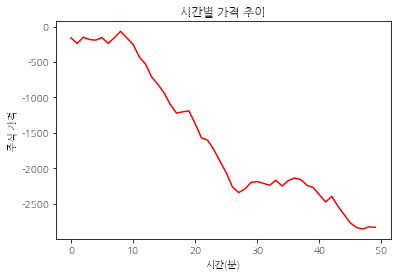

In [ ]:
# 데이터 준비
data = np.random.randint(-200, 100, 50).cumsum()
data
# 그래프를 그려보자. 이번에는 정상
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

In [ ]:
!pip install konlpy

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
import nltk
from konlpy.tag import Kkma ### 꼬꼬마
from konlpy.tag import Hannanum ### 한나눔
### wordcloud와 이미지 표시
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
### 데이터 읽기
text = open("alice.txt").read()

In [ ]:
### wordcloud의 불용어 단어 확인
print( type(STOPWORDS) )
print(STOPWORDS) #불용어 의미가 없는 말?

<class 'set'>
{'did', 'or', "that's", "you'll", 'themselves', 'these', "they're", "why's", 'again', "here's", 'our', 'about', 'a', 'why', 'since', "mustn't", 'any', 'it', "he'll", 'ever', 'she', 'for', 'r', "can't", 'was', 'himself', "we'll", 'nor', "what's", "wouldn't", 'yours', 'where', 'your', 'could', 'had', "doesn't", 'down', 'both', "she's", 'were', 'is', "they'll", 'against', 'also', "i've", 'just', 'herself', "hadn't", 'this', 'through', 'her', 'off', 'you', 'k', 'com', "let's", 'ought', 'after', 'else', 'few', 'they', 'whom', "he'd", "they've", 'up', "when's", 'does', "we'd", 'as', "who's", "you're", 'being', 'by', 'ours', 'yourselves', 'from', 'have', 'all', 'so', 'such', 'am', 'of', 'only', 'here', 'shall', 'than', 'out', 'the', 'on', "i'll", 'once', "haven't", 'can', "you'd", "we've", 'other', 'who', 'there', 'until', "i'm", 'which', 'would', "she'll", 'itself', 'him', "don't", 'its', 'otherwise', 'should', 'cannot', 'that', 'them', 'too', 'but', 'has', "there's", 'under', 

In [ ]:
## 집합 확인
s2 = set([1,2,3,4,5,1,2])
s2
print( len(STOPWORDS) )
stopwords = set(STOPWORDS)
print( len(stopwords))

190
190


In [ ]:
### 불용어 단어 추가
stopwords = set(STOPWORDS) #불용어 반복되지만 가져올 필요가 없는 단어?
stopwords.add("said")
print( len(stopwords) ) # 190 -> 191로 변경
stopwords

In [ ]:
# alice_mask = np.array(Image.open("alice_color.png"))
alice_mask = np.array(Image.open("alice_color.png"))
alice_mask[0] # 이미지 배열화된 내용 하나의 정보 확인

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [ ]:
### 워드 클라우드 표현을 위한 데이터 생성
wc=WordCloud(background_color='white', #배경색
             max_words=2000, #최대 단어수
             mask=alice_mask,#여기다 덮어 쒸운다
             contour_width=3, #외각선
             collocations=False, #2단어 이상의 연관을 허용 안함
             contour_color='steelblue') #둘레 색?
wc.generate(text) #text사용빈도 비율화
wc.words_

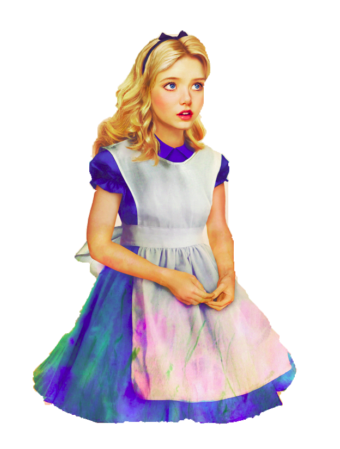

In [ ]:
plt.figure(figsize=(15,8)) # 크기
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear') #interpolation: 수치확인 cmap matplotlib의 칼라 집합중 하나!
plt.axis('off') #
plt.show()

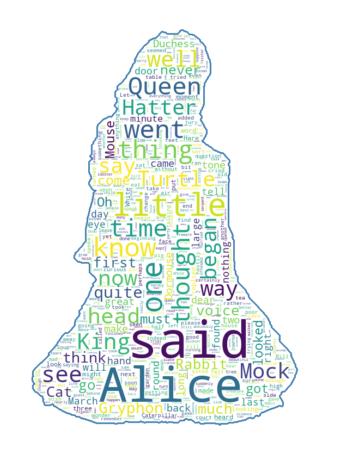

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
doc_ko = open("15_TheExtreme_utf8.txt").read() #잘 못읽어오면 판다스 데이터 프래임으로 만들어서 처리!
doc_ko[1:1000] 

'"x"\n"1" " 분노의 질주 시리즈중에서 제일 별루"\n"2" " 스케일 큰 시끄러운 액션이 난무하는데도 이렇게까지 지루할수 있다니....."\n"3" " 시~원 하게 잘 본 영화. 다음 시리즈에서는 여자 주인공의 비중이 더 높아졌으면 하는 바램!"\n"4" " 반지닦기, 자살닦이, 고무닦이, 정의닦이...로 이어지는 한심한 DC 시리즈 \n레지던트 이블 시리즈 \n그리고 이 영화 분노의 질주 시리즈 \n공통점은 시리즈가 거듭될수록 돈은 많이 들지만 재미는 없어지고 \nCG는 떡질되지만 실감나는 장면은 더 없어지도 뻔히 가짜라는게 드러나는 영화들 \n그러나\n아무리 엉터리로 만들고, 자국에서 망해도 \n미국 블록버스터라면 맹목적으로 보는 중국애들 땜에 \n아무리 쓰레기 영화라도 본전 건지는 것은 물론 상당히 많은 돈을 버니... \n이런 쓰레기들이 매년 양산된다. \n물론, 중국애들도 할말은 있을 거다 \n공산당이 검열하는 자국영화보다는 낫다고... \n하지만 우리들은 다른 전세계의 재미있는 영화를 볼 선택의 자유가 있쟎아! \n왜 이런 쓰레기 영화를 보는 거지?"\n"5" " "\n"6" " 그냥 액션만 보면 멋진데\n스토리는 주인공이 전여친한테 싸지른\n애새끼 구하러 간다며 아빠행세하면서\n그 덕분에 지동료들 다 버리고 미쳐 날뛰는 내용"\n"7" " "\n"8" " 아래는 다들 평점 알바들인가부네.. 이런 개 쓰레기 영화가 평점이 이리 높다니"\n"9" " "\n"10" " "\n"11" " "\n"12" " "\n"13" " "\n"14" " "\n"15" " 스케일은 점점 더 커지지만, 액션은 멍청할정도로 어이가없음 과유불급"\n"16" " 이 시리즈로 이렇게 길게 간다는게 신기.. 새로울 건 없지만 달리는 걸 좋아하시는 분이라면 "\n"17" " "\n"18" " "\n"19" " "\n"20" " 대머리들은 TV물로 찍고,\n감독은 CG실에서 이어붙히고."\n"21" " "\n"22" " "\n"23" " "\n"24" " "\n"25" " 

In [ ]:
# OKT 클래스를 이용한 명사확인 Okt (11초 : 4286), Kkma (37초 : 5572)
from konlpy.tag import Okt ### Okt
t = Okt()
#from konlpy.tag import Kkma ### Okt
#t = Kkma()
doc_nouns = t.nouns(doc_ko)
print( len( doc_nouns ) )
doc_nouns

In [ ]:
# nltk.Text()를 이용하여 nltk가 가지는 많은 기능을 사용 가능해짐.
ko = nltk.Text(doc_nouns, name="분노의 질주") #빈도분석? 다양한 기능 사용하기 위하여 nltk 토큰으로 만듬
print(type(ko)) #토큰= 뛰어쓰기로 나누어진 단어
print(len(ko.tokens))

<class 'nltk.text.Text'>
4286


In [ ]:
ko.vocab().most_common(100)

In [ ]:
most_fre=ko.vocab().most_common(50)


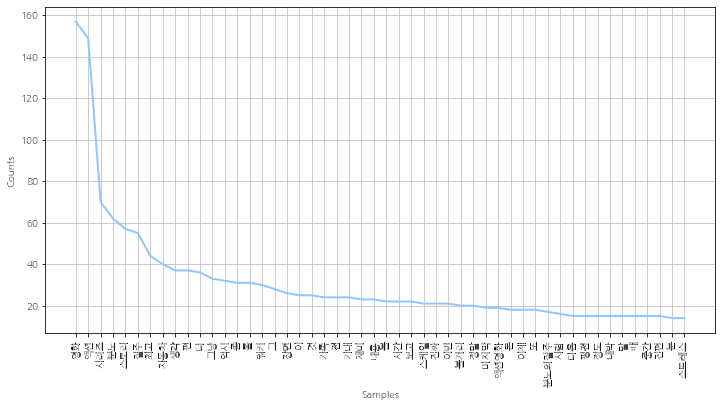

In [ ]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

In [ ]:
### 한글에서는 따로 불용어 사전이 없어, 따로 만들거나 또는 파일로 부터 불러올 수 있다.
stop_words = ['편','더','그냥','워커','그','이','것','점','볼','이제','또','말','때']
new_ko = [ ]
for one_word in ko:
  if one_word not in stop_words:
    new_ko.append(one_word)

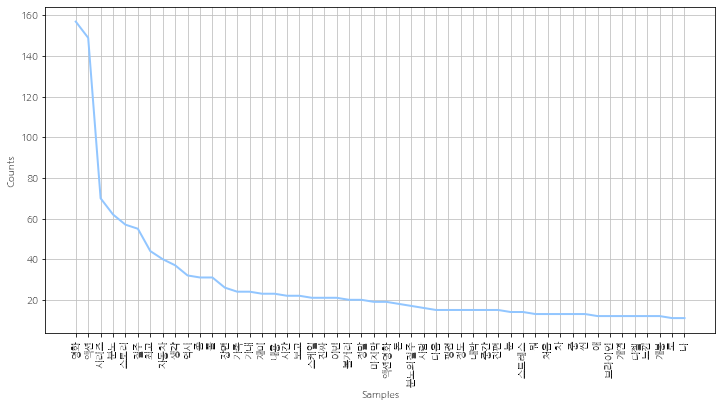

In [ ]:
### nltk Text 객체 만들기
new_ko = nltk.Text(new_ko, name="분노의 질주2")
plt.figure(figsize=(12,6))
new_ko.plot(50)

In [ ]:
f = open("stop_wrds.txt")
lines = f.readlines()
stop_words = []
for one in lines:
  stop_words.append(one.strip())
new_ko_2 = [ ]
for one_word in new_ko:
  if one_word not in stop_words:
    new_ko_2.append(one_word)

In [ ]:
new_ko2 = nltk.Text(new_ko_2, name="분노의 질주2")
plt.figure(figsize=(12,6))
new_ko2.plot(50)

In [ ]:
plt.figure(figsize=(15,8))
new_ko.dispersion_plot(['스토리', '대박', '스트레스', '브라이언'])

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [ ]:
Car_mask = np.array(Image.open("Draw_car1.png"))

In [ ]:
data = new_ko.vocab().most_common(1000)

In [ ]:
### 워드 클라우드 표현을 위한 데이터 생성
### 약간의 시간이 필요.
wc = WordCloud(background_color='white',
max_words=200,
mask=Car_mask,
contour_width=3,
contour_color="steelblue",
font_path=path).generate_from_frequencies(dict(data))

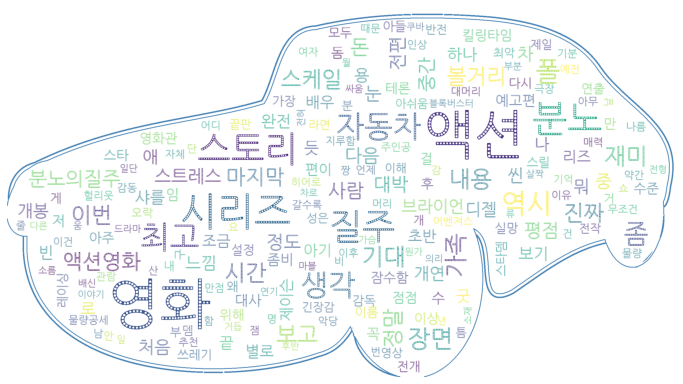

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
### 데이터 읽기
txt_ron = open("run.txt").read()
txt_ron[1:1000]

'013년.\n\n세계는 경악했다.\n\n모두가 무시했던 작은 나라.\n\n거대한 중국에 조그맣게 붙어있는 한국이란 나라에서 등장한 하나의 게임.\n\n그것은 전 세계의 사람들에게 그동안 무시당했던 것을 갚으려는 듯, 거대한 파문을 가지고, 모든 이들의 가슴속에 깊은 인상을 남겼다.\n\n게임이 발달되기 시작한 1990년대 이후부터 꿈으로만 느껴지던 가상현실!\n\n모든 이들의 상상에서만 등장하던 가상현실이 조그만 나라에서 현실로 이루어졌기에 모든 세계는 그것을 만들어낸 나라와 기업, 그리고 사람에 시선을 집중했다.\n\n「싸울아비」 최초로 등장한 가상현실 게임이 그들의 상상을 채워줄 것인지가 전 세계의 관심사였다.\n\n"씨발!"\n퍽!\n"큭!?"\n\n갑자기 달려드는 한 소년에 의해 갑자기 얼굴을 얻어맞은 또 다른 소년은 어리둥절한 표정을 지으며 자신을 때린 소년을 바라보았다.\n\n"병신새끼야! 수비면 수비답게 안에서 깝칠것이지. 왜 나와서 지랄했어! 앙!?"\n"닥쳐, 씨발새꺄. 아현이가 막판에 전부 공격하자는건 못들었냐?"\n"이 씨발새끼가!!"\n\n탁!\n\n조용조용 말하는 소년의 목소리 때문에 더욱 화가 난 것인지 처음 주먹을 날렸던 소년이 다시한번 강하게 휘둘렀지만 그의 주먹은 허무하게 튕겨졌고, 싸움은 잠시 소강상태로 들어갔다.\n\n"마, 말려야 하는거 아냐?"\n"어라? 찬승이가 화났네?"\n\n같은 반의 여학생인 듯한 소녀들은 남학생들이 싸움을 말리기 바랬지만 체육시간이 끝나고 천천히 들어오던 아이들은 그 둘의 싸움을 보며, 오히려 재미있다는 표정을 지으며 그들을 무시하고 지나쳤다.\n\n"하! 이 병신새끼가 꼴에 막네?"\n\'칠까? 하지만 죽을 수도 있을텐데?\'\n"씨발새꺄 네가 막으면 어쩔건데?"\n\n찬승이가 자신을 바라보며 욕을 하던지 말던지 상관하지 않던 그는 찬승을 바라보며 그를 칠까말까를 고민했다. 그 자신이 보기에 찬승이의 곳곳에 때릴 수 있는 공간이 있었기에 그가 움직이기만 한다면 주먹질 몇 번으로 찬승이의 무릎을 

In [ ]:
# OKT 클래스를 이용한 명사확인 Okt (11초 : 4286), Kkma (37초 : 5572)
from konlpy.tag import Okt ### Okt
t = Okt()
#from konlpy.tag import Kkma ### Okt
#t = Kkma()
doc_nouns = t.nouns(txt_ron)
print( len( doc_nouns ) )

5270


In [ ]:
# nltk.Text()를 이용하여 nltk가 가지는 많은 기능을 사용 가능해짐.
ro = nltk.Text(doc_nouns, name="싸울아비 룬")
print(type(ro))
print(len(ro.tokens))

<class 'nltk.text.Text'>
5270


In [ ]:
### 단어들의 사용 횟수 확인 - 빈도 분석
type( ro.vocab() ), ro.vocab().most_common(20)

In [ ]:
most_fre = ro.vocab().most_common(50)
most_fre

In [ ]:
f = open("stop_word.txt")
lines = f.readlines()
stop_words = []
for one in lines:
  stop_words.append(one.strip())
new_ro_2 = [ ]
for one_word in ro:
  if one_word not in stop_words:
    new_ro_2.append(one_word)

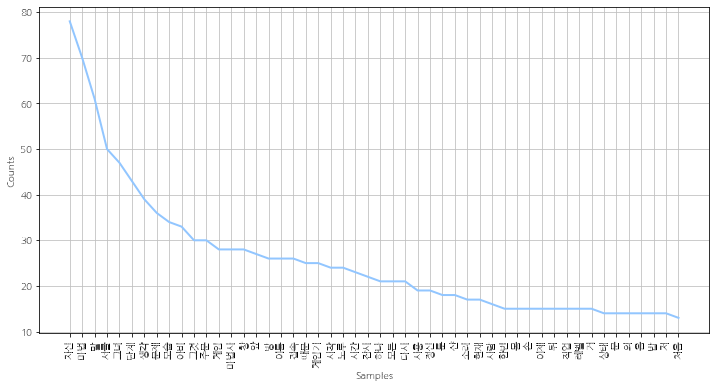

In [ ]:
new_ro2 = nltk.Text(new_ro_2, name="싸울아비 룬")
plt.figure(figsize=(12,6))
new_ro2.plot(50)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [ ]:
print(len(set(ko.tokens)))

1381


In [ ]:
Cap_mask = np.array(Image.open("Cap.png"))

In [ ]:
data = new_ro2.vocab().most_common(1000)

In [ ]:
## 워드 클라우드 표현을 위한 데이터 생성
### 약간의 시간이 필요.
wc = WordCloud(background_color='white',
max_words=200,
mask=Cap_mask,
contour_width=3,
contour_color="steelblue",
font_path=path).generate_from_frequencies(dict(data))

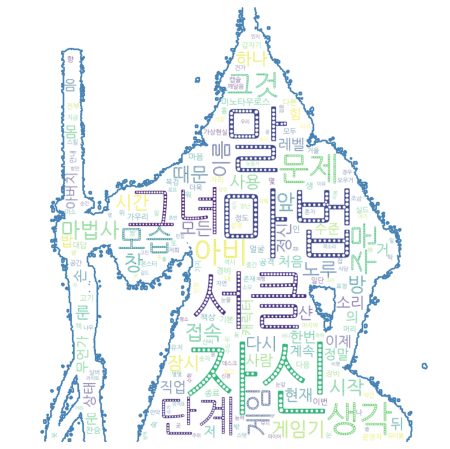

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
plt.show()